In [3]:
import pickle
import gzip
import numpy as np
from sklearn.cross_validation import KFold
from sklearn.cross_validation import StratifiedKFold
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import time

### Loading of the data

In [23]:
start = time.time()
#Inselspital
%ls -lh /home/dueo/data/Inselspital_2015_07_08/
with open('/home/dueo/data/Inselspital_2015_07_08/GBM.pickle') as f:
    Names,X,Y,l = pickle.load(f)
print ("Loaded data in " + str(time.time() - start))
print ("   " + str(X.shape) + " y " + str(Y.shape) + " " + str(np.max(Y)))
np.histogram(Y, bins=[0, 1, 2, 3,4,5,6])

total 3.1G
drwxr-xr-x 62 dueo dueo  4.0K Jun  5 04:43 GBM/
-r--r--r--  1 dueo dueo  1.1G Jul 16 17:31 GBM.pickle
-rw-r--r--  1 dueo dueo  509M Jun 18 16:22 GBM.zip
-rw-r--r--  1 dueo dueo  269K Jun 23 13:05 list_GBM.txt
-rw-r--r--  1 dueo dueo  282K Jun 23 13:07 list_meta.txt
-r--r--r--  1 dueo dueo 1003M Jul 17 14:01 META.pickle
drwxr-xr-x 68 dueo dueo  4.0K Jun  5 05:26 metastasis/
-rw-r--r--  1 dueo dueo  455M Jun 18 16:21 metastasis.zip
Loaded data in 1.88176202774
   (1110, 1, 256, 256) y (1110, 1, 256, 256) 2.0


(array([71481686,   142576,  1120698,        0,        0,        0]),
 array([0, 1, 2, 3, 4, 5, 6]))

In [25]:
start = time.time()
with open('/home/dueo/data/Inselspital_2015_07_08/META.pickle') as f:
    Names_M,X_M,Y_M,l_M = pickle.load(f)
print ("Loaded data in " + str(time.time() - start))
print ("   " + str(X_M.shape) + " y " + str(Y_M.shape) + " " + str(np.max(Y_M)))
np.histogram(Y_M, bins=[0, 1, 2, 3,4,5,6])

Loaded data in 1.54126286507
   (1002, 1, 256, 256) y (1002, 1, 256, 256) 3.0


(array([64990823,    69261,        0,   606988,        0,        0]),
 array([0, 1, 2, 3, 4, 5, 6]))

### Comparison with the image send by Johannes
Here the image send from Johannes. It seems that the slice is the slice numbered 12.


<img src="TEST-CASE.png", width=800>

In [27]:
idx = 21
Names[idx]

'ZS4VC2AHI7DAMJ2K6HWUW5CFEE======_ep2d_diff_3scan_p3_m128_ADC_3_12.dcm'

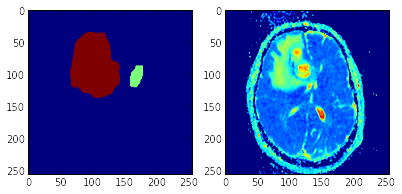

In [32]:
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplot(131)
plt.imshow(Y[idx,0,:,:])
plt.subplot(132)
plt.imshow(X[idx,0,:,:])

In [33]:
Y[idx,0,100,100] #2 The big thing is a tumor
Y[idx,0,100,160] #1 The small thing is normal tissue
np.max(Y)

2.0

1.0

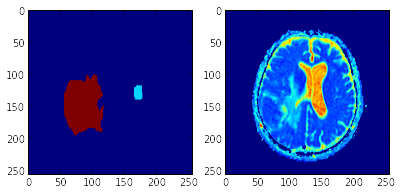

In [58]:
import pylab
idx = 46
pylab.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplot(131)
plt.imshow(Y_M[idx,0,:,:])
plt.subplot(132)
plt.imshow(X_M[idx,0,:,:])
Y_M[idx,0,130,75]  #3 The big one
Y_M[idx,0,130,170] #1 The small one (is also 1 just differnent color dueo to scaling teh color scale)

### Annotation
The Questions remains, how Johannes annotates the *normal tissue* is this some 'super normal' tissue? 